In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Monthly Rainfall Index and Flood Probability Kerala.csv")

df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [4]:
df['FLOODS'] = df['FLOODS'].replace('YES', 1)
df['FLOODS'] = df['FLOODS'].replace('NO', 0)
df.drop(['SUBDIVISION', ' ANNUAL RAINFALL'], axis=1, inplace=True)

In [5]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,0


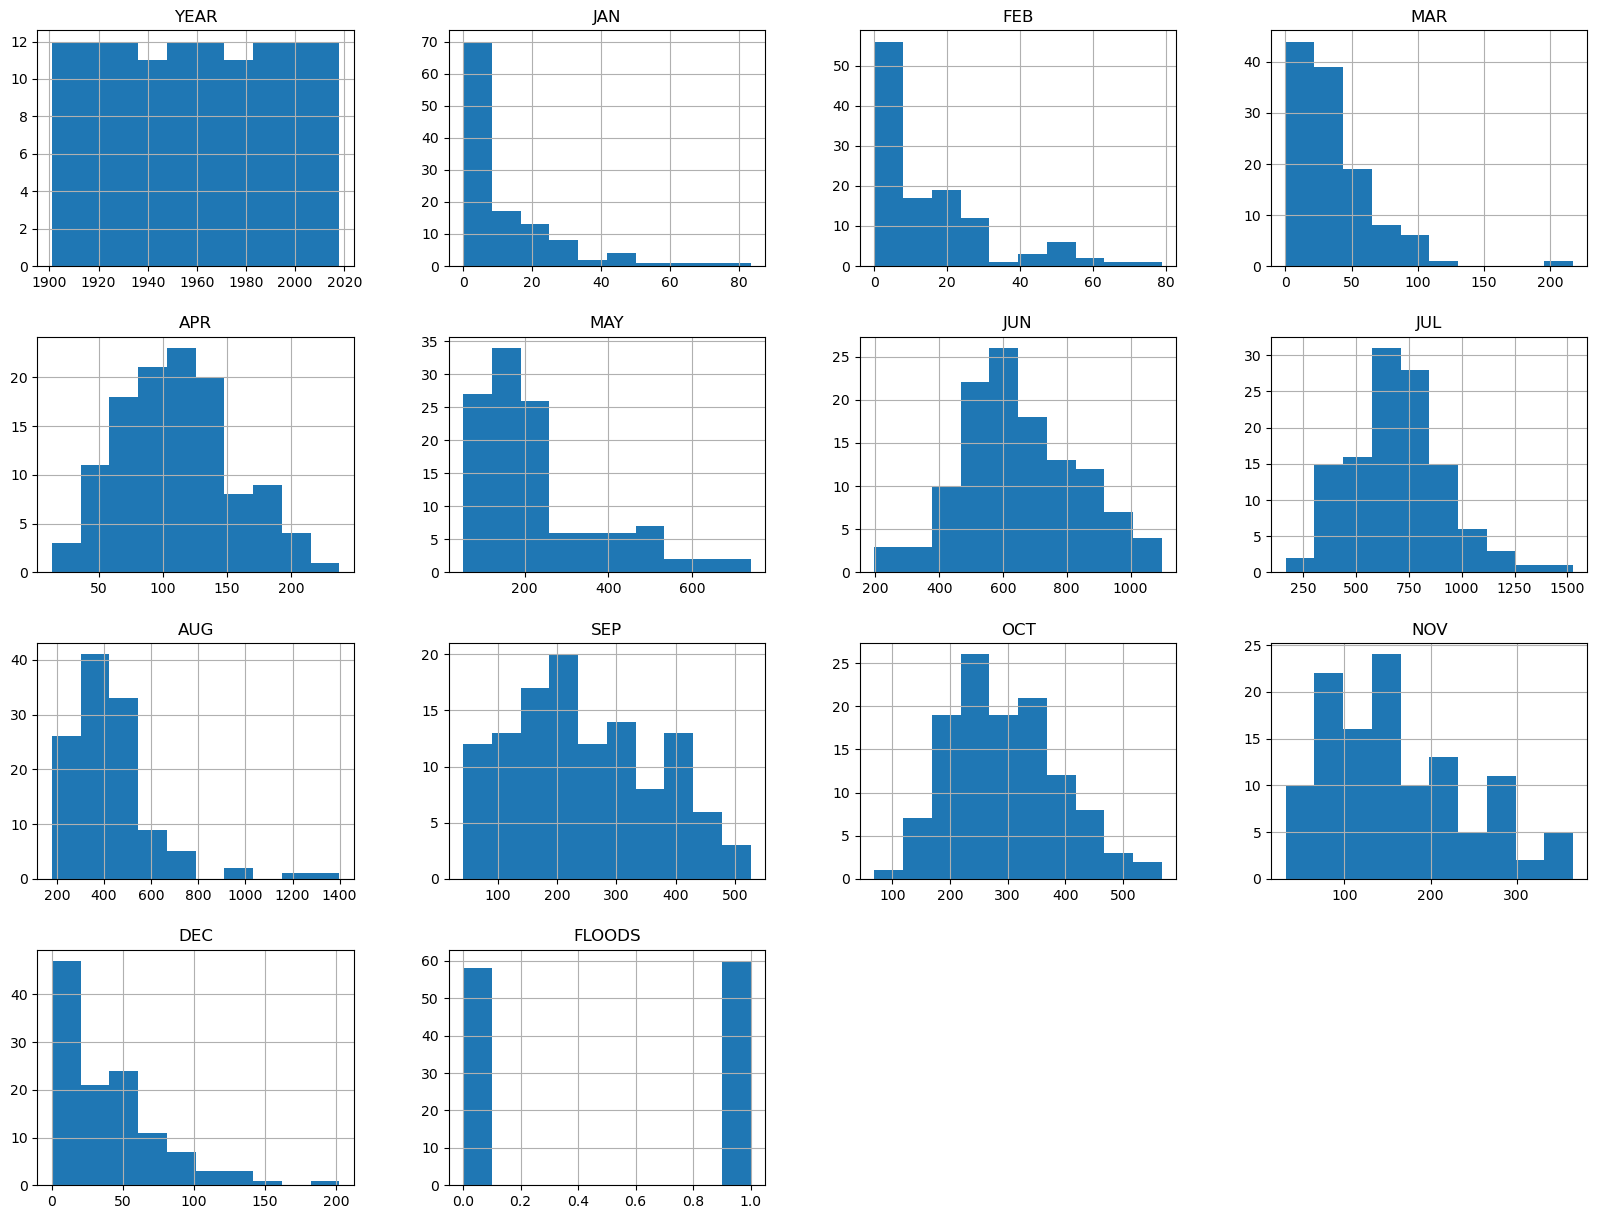

In [6]:
df.hist(bins=10, figsize=(20,15))
plt.show()

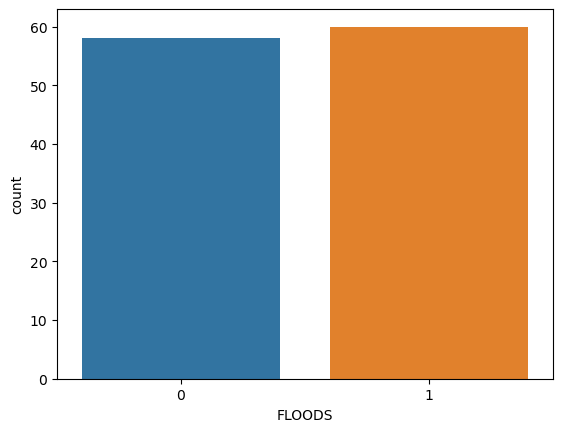

In [7]:
sns.countplot(data=df,x='FLOODS')
plt.show()

In [8]:
corr_matrix = df.corr()
corr_matrix['FLOODS'].sort_values(ascending=False)

FLOODS    1.000000
JUL       0.442774
JUN       0.442531
SEP       0.376385
AUG       0.286690
MAY       0.242813
NOV       0.238852
JAN       0.145313
MAR       0.086739
OCT       0.060088
DEC       0.054326
APR       0.034392
FEB      -0.035730
YEAR     -0.202548
Name: FLOODS, dtype: float64

<AxesSubplot:>

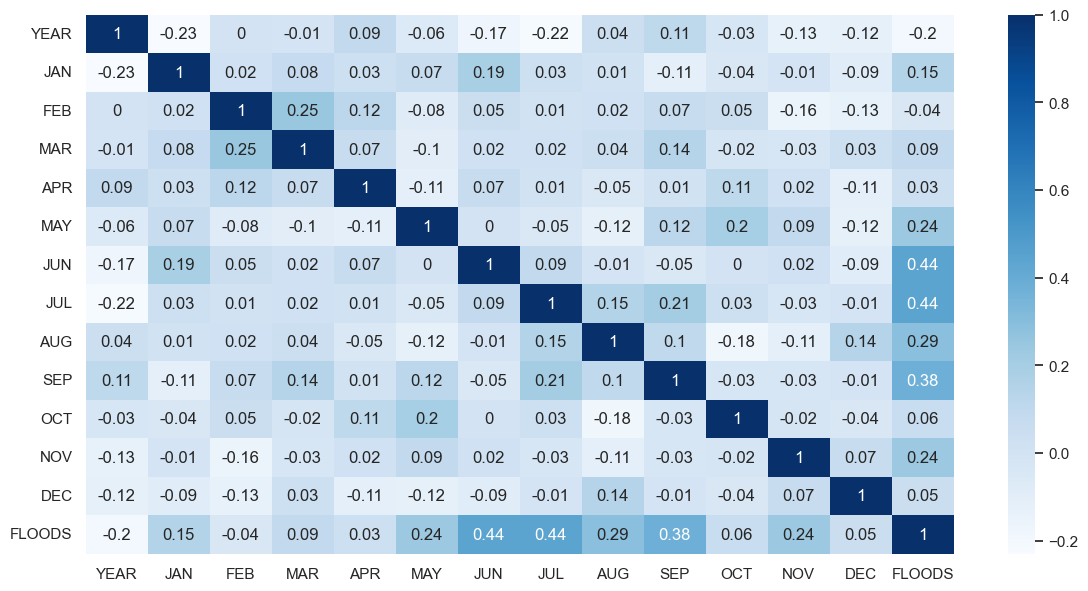

In [9]:
corr_matrix = df.corr().round(2)
sns.set(font_scale=1)
plt.figure(figsize = (14,7))
sns.heatmap(corr_matrix, annot = True, cmap='Blues')

In [10]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,0


In [165]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [166]:
from keras.optimizers import Adam
from keras import layers
from keras.models import Sequential

In [167]:
def model_builder(hp):
    model = Sequential()

    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=14, step=1)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=101, step=1)
    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])

    model.add(layers.Dense(units=hp_layer_1, activation=hp_activation))
    model.add(layers.Dense(units=hp_layer_2, activation=hp_activation))
    model.add(layers.Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

    return model

In [168]:
import keras_tuner as kt

In [184]:
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='dir',
    overwrite=True
)

In [185]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [186]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[stop_early])

Trial 90 Complete [00h 00m 02s]
val_accuracy: 0.5

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 03m 35s
INFO:tensorflow:Oracle triggered exit


In [187]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [188]:
model =  tuner.hypermodel.build(best_hyperparameters)

history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[stop_early])

Epoch 1/50
3/3 [==============================] - 1s 176ms/step - loss: 0.6524 - accuracy: 0.6190 - val_loss: 0.5541 - val_accuracy: 0.9000
Epoch 2/50
3/3 [==============================] - 0s 27ms/step - loss: 0.4971 - accuracy: 0.8690 - val_loss: 0.4582 - val_accuracy: 0.9000
Epoch 3/50
3/3 [==============================] - 0s 27ms/step - loss: 0.3978 - accuracy: 0.9048 - val_loss: 0.3692 - val_accuracy: 0.9000
Epoch 4/50
3/3 [==============================] - 0s 27ms/step - loss: 0.3127 - accuracy: 0.9524 - val_loss: 0.2884 - val_accuracy: 0.9000
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 0.2436 - accuracy: 0.9524 - val_loss: 0.2184 - val_accuracy: 0.9000
Epoch 6/50
3/3 [==============================] - 0s 27ms/step - loss: 0.1837 - accuracy: 0.9524 - val_loss: 0.1845 - val_accuracy: 0.9000
Epoch 7/50
3/3 [==============================] - 0s 28ms/step - loss: 0.1390 - accuracy: 0.9524 - val_loss: 0.1636 - val_accuracy: 0.9000
Epoch 8/50
3/3 [==========

In [189]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.652449,0.619048,0.554081,0.9
1,0.497104,0.869048,0.458174,0.9
2,0.397796,0.904762,0.369179,0.9
3,0.312667,0.952381,0.288385,0.9
4,0.243614,0.952381,0.218385,0.9
5,0.183745,0.952381,0.184541,0.9
6,0.139002,0.952381,0.163593,0.9
7,0.104104,0.988095,0.164967,0.9
8,0.078325,0.988095,0.171197,0.9
9,0.057081,1.000000,0.201945,0.9


In [190]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 14)                182       
                                                                 
 dense_4 (Dense)             (None, 23)                345       
                                                                 
 dense_5 (Dense)             (None, 1)                 24        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [198]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 36ms/step


In [199]:
y_pred = (y_pred>0.5)

y_pred = y_pred.reshape(-1)

y_pred = y_pred.astype(int)

In [200]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

<AxesSubplot:>

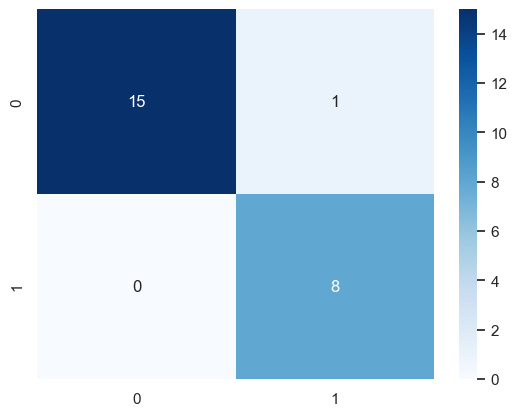

In [201]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.89      1.00      0.94         8

    accuracy                           0.96        24
   macro avg       0.94      0.97      0.95        24
weighted avg       0.96      0.96      0.96        24



In [203]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy Score:  0.9583333333333334
F1 Score:  0.9411764705882353


In [204]:
model.save('flood_prediction_model.h5')